# Greedy vs Epsilon-Greedy

Bandit algorithms seek to find ways to balance exploration vs. exploration of the available actions. A greedy action is one in which the action with the highest expected reward is chosen:
$$
\hat{a} = \underset{a}{\operatorname{argmax}} \mathbb{E}[R|a]\,,
$$
with ties between actions broken randomly. A bandit that always selects the greedy action is called the "Greedy Bandit" algorithm, and is implemented in this package in `bandit.GreedyBandit`.

Risk exists in being always greedy, because the bandit may have poor information about which action yields the highest expected reward which could yield in a sub-optimal selection. A basic was to mitigate this is to select an action purely at random some small fraction ($\epsilon$) of the time. That is, if the bandit takes $N$ steps in total, then we expect on average that $N\epsilon$ will result in completely random selections, while $N(1-\epsilon)$ will be greedy selection. This algorithm is called "Epsilon-Greedy" and is implimented here in `bandit.EpsGreedyBandit`.

## Bandit experiment

In this notebook we run an experiment where we take many greedy, epsilon-greedy, and purely random bandits and see how they perform. The environment that they sample rewards from is one with a small number of rewards (relative to the total number of steps taken) that yield Gaussian (normally) distributed rewards with unit variance and means distributed according to a unit Gaussian. In other words, the $i$-th bandit is distributed accoring to
$$
R_i \sim \mathcal{N}(\mu_i \sim \mathcal{N}(0, 1), 1)\,.
$$
Note that the means $\mu$ are drawn once at the start of the experiment and remain the same the whole time.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from bandit.bandit import (
    EpsGreedyBandit, 
    GreedyBandit, 
    RandomBandit,
)
from bandit.environment import Environment
from bandit.reward import GaussianReward
from bandit.figures import (
    plot_average_rewards,
    plot_reward_distributions,
)

In [3]:
rbandits = []
gbandits = []
ebandits = []
N = 100  # Number of each kind of bandit
Nsteps = 500  # Number of steps for the bandits to take
best_choices = np.zeros(N)
for i in range(N):
    # Make the rewards and environment
    rewards = [GaussianReward(mean = np.random.randn()) for _ in range(10)]
    env = Environment(rewards)
    # Figure out the best reward
    best_choices[i] = np.argmax(env.expected_rewards())
    # Make the bandits
    gbandits.append(GreedyBandit(env))
    ebandits.append(EpsGreedyBandit(env, eps=0.1))
    rbandits.append(RandomBandit(env))
    for _ in range(Nsteps):
        rbandits[-1].action()
    for _ in range(Nsteps):
        gbandits[-1].action()
    for _ in range(Nsteps):
        ebandits[-1].action()
    if (i+1) % 20 == 0:
        print(f"Done with {i+1} bandits")

Done with 20 bandits
Done with 40 bandits
Done with 60 bandits
Done with 80 bandits
Done with 100 bandits


In [4]:
# Pull out the histories
rrewards = [b.reward_history for b in rbandits]
grewards = [b.reward_history for b in gbandits]
erewards = [b.reward_history for b in ebandits]

Text(0, 0.5, 'Average Reward')

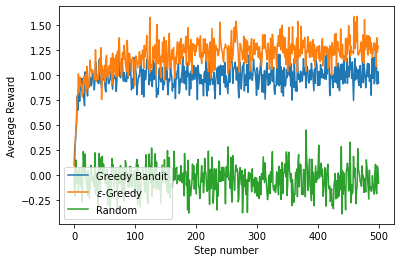

In [5]:
fig, ax = plot_average_rewards(grewards, label="Greedy Bandit")
fig, ax = plot_average_rewards(erewards, ax, label=r"$\epsilon$-Greedy")
fig, ax = plot_average_rewards(rrewards, ax, label="Random")
ax.legend(loc="lower left")
ax.set_xlabel(r"Step number")
ax.set_ylabel("Average Reward")

In [6]:
gchoices = np.array([b.choice_history for b in gbandits])
echoices = np.array([b.choice_history for b in ebandits])
rchoices = np.array([b.choice_history for b in rbandits])

Text(0, 0.5, 'Average fraction of optimal selection')

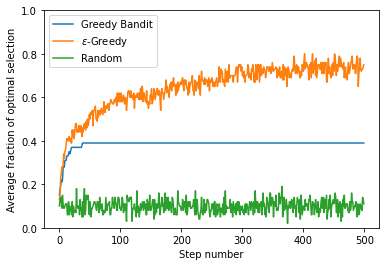

In [7]:
plt.plot(np.mean(gchoices == best_choices[:, np.newaxis], axis=0), label="Greedy Bandit")
plt.plot(np.mean(echoices == best_choices[:, np.newaxis], axis=0), label=r"$\epsilon$-Greedy")
plt.plot(np.mean(rchoices == best_choices[:, np.newaxis], axis=0), label="Random")
plt.ylim(0, 1)
ax = plt.gca()
ax.legend(loc="upper left")
ax.set_xlabel(r"Step number")
ax.set_ylabel("Average fraction of optimal selection")